# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [18]:
import os
import keras
import itertools

#Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [19]:
train, test = keras.datasets.cifar10.load_data()

In [20]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [21]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [22]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [23]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZER = [keras.optimizers.SGD, keras.optimizers.RMSprop, keras.optimizers.Adagrad, keras.optimizers.Adam]

In [24]:
results = {}
for lr, opti in itertools.product(LEARNING_RATE, OPTIMIZER):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Optimizer = %s" % (lr, str(opti)))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    
    optimizer = opti(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-optimizer-%s" % (str(lr), str(opti))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.SGD'>
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
____________________________________________________

50000/50000 [==============================] - 18s 360us/step - loss: 0.7976 - acc: 0.7167 - val_loss: 1.8119 - val_acc: 0.4570
Epoch 48/50
50000/50000 [==============================] - 18s 359us/step - loss: 0.7700 - acc: 0.7264 - val_loss: 1.5895 - val_acc: 0.5194
Epoch 49/50
50000/50000 [==============================] - 18s 360us/step - loss: 0.7600 - acc: 0.7281 - val_loss: 1.7519 - val_acc: 0.4809
Epoch 50/50
50000/50000 [==============================] - 18s 359us/step - loss: 0.7561 - acc: 0.7299 - val_loss: 1.7776 - val_acc: 0.4860
Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.RMSprop'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
____________________________________________

Epoch 47/50
50000/50000 [==============================] - 21s 416us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 21s 419us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 22s 431us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 24s 482us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.Adagrad'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
________________________

50000/50000 [==============================] - 21s 417us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 21s 413us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 22s 444us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 35s 693us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 33s 659us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.100000, Optimizer = <class 'keras.optimizers.Adam'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_____________________________

Epoch 46/50
50000/50000 [==============================] - 37s 737us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 24s 488us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 22s 445us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 24s 480us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 22s 447us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.010000, Optimizer = <class 'keras.optimizers.SGD'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
__________________

50000/50000 [==============================] - 19s 387us/step - loss: 1.2629 - acc: 0.5568 - val_loss: 1.4413 - val_acc: 0.4881
Epoch 47/50
50000/50000 [==============================] - 19s 388us/step - loss: 1.2568 - acc: 0.5586 - val_loss: 1.5653 - val_acc: 0.4638
Epoch 48/50
50000/50000 [==============================] - 19s 381us/step - loss: 1.2463 - acc: 0.5616 - val_loss: 1.4734 - val_acc: 0.4726
Epoch 49/50
50000/50000 [==============================] - 19s 378us/step - loss: 1.2465 - acc: 0.5631 - val_loss: 1.3813 - val_acc: 0.5067
Epoch 50/50
50000/50000 [==============================] - 19s 378us/step - loss: 1.2300 - acc: 0.5681 - val_loss: 1.5403 - val_acc: 0.4611
Experiment with LR = 0.010000, Optimizer = <class 'keras.optimizers.RMSprop'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
____________________________________

Epoch 46/50
50000/50000 [==============================] - 31s 617us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 32s 649us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 20s 395us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 23s 464us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 20s 409us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.010000, Optimizer = <class 'keras.optimizers.Adagrad'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
______________

Epoch 46/50
50000/50000 [==============================] - 20s 408us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 20s 406us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 20s 406us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 21s 419us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 20s 408us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.010000, Optimizer = <class 'keras.optimizers.Adam'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________

Epoch 46/50
50000/50000 [==============================] - 22s 439us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 22s 441us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 22s 445us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 22s 437us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 24s 475us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.001000, Optimizer = <class 'keras.optimizers.SGD'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
__________________

50000/50000 [==============================] - 19s 383us/step - loss: 1.6802 - acc: 0.4162 - val_loss: 1.6823 - val_acc: 0.4170
Epoch 47/50
50000/50000 [==============================] - 18s 370us/step - loss: 1.6764 - acc: 0.4176 - val_loss: 1.6820 - val_acc: 0.4179
Epoch 48/50
50000/50000 [==============================] - 18s 369us/step - loss: 1.6729 - acc: 0.4184 - val_loss: 1.6761 - val_acc: 0.4167
Epoch 49/50
50000/50000 [==============================] - 18s 369us/step - loss: 1.6692 - acc: 0.4200 - val_loss: 1.6727 - val_acc: 0.4184
Epoch 50/50
50000/50000 [==============================] - 19s 371us/step - loss: 1.6656 - acc: 0.4217 - val_loss: 1.6699 - val_acc: 0.4188
Experiment with LR = 0.001000, Optimizer = <class 'keras.optimizers.RMSprop'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
____________________________________

50000/50000 [==============================] - 20s 399us/step - loss: 0.8685 - acc: 0.6874 - val_loss: 1.9296 - val_acc: 0.4597
Epoch 47/50
50000/50000 [==============================] - 20s 398us/step - loss: 0.8578 - acc: 0.6913 - val_loss: 1.8973 - val_acc: 0.4789
Epoch 48/50
50000/50000 [==============================] - 20s 400us/step - loss: 0.8439 - acc: 0.6965 - val_loss: 1.8508 - val_acc: 0.4869
Epoch 49/50
50000/50000 [==============================] - 20s 402us/step - loss: 0.8370 - acc: 0.6991 - val_loss: 1.8814 - val_acc: 0.4752
Epoch 50/50
50000/50000 [==============================] - 20s 403us/step - loss: 0.8277 - acc: 0.7024 - val_loss: 1.7604 - val_acc: 0.4980
Experiment with LR = 0.001000, Optimizer = <class 'keras.optimizers.Adagrad'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
____________________________________

50000/50000 [==============================] - 19s 383us/step - loss: 1.2752 - acc: 0.5596 - val_loss: 1.3968 - val_acc: 0.5077
Epoch 47/50
50000/50000 [==============================] - 19s 385us/step - loss: 1.2710 - acc: 0.5589 - val_loss: 1.3808 - val_acc: 0.5086
Epoch 48/50
50000/50000 [==============================] - 19s 384us/step - loss: 1.2665 - acc: 0.5598 - val_loss: 1.3767 - val_acc: 0.5145
Epoch 49/50
50000/50000 [==============================] - 19s 384us/step - loss: 1.2627 - acc: 0.5609 - val_loss: 1.3766 - val_acc: 0.5148
Epoch 50/50
50000/50000 [==============================] - 19s 385us/step - loss: 1.2587 - acc: 0.5643 - val_loss: 1.3690 - val_acc: 0.5183
Experiment with LR = 0.001000, Optimizer = <class 'keras.optimizers.Adam'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_______________________________________

50000/50000 [==============================] - 21s 417us/step - loss: 0.6812 - acc: 0.7557 - val_loss: 1.7102 - val_acc: 0.5178
Epoch 47/50
50000/50000 [==============================] - 21s 418us/step - loss: 0.6639 - acc: 0.7636 - val_loss: 1.7103 - val_acc: 0.5214
Epoch 48/50
50000/50000 [==============================] - 21s 422us/step - loss: 0.6581 - acc: 0.7639 - val_loss: 1.7327 - val_acc: 0.5227
Epoch 49/50
50000/50000 [==============================] - 21s 419us/step - loss: 0.6389 - acc: 0.7720 - val_loss: 1.7434 - val_acc: 0.5211
Epoch 50/50
50000/50000 [==============================] - 21s 420us/step - loss: 0.6332 - acc: 0.7722 - val_loss: 1.8143 - val_acc: 0.5136
Experiment with LR = 0.000100, Optimizer = <class 'keras.optimizers.SGD'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
________________________________________

50000/50000 [==============================] - 19s 379us/step - loss: 2.0437 - acc: 0.2787 - val_loss: 2.0441 - val_acc: 0.2796
Epoch 47/50
50000/50000 [==============================] - 19s 371us/step - loss: 2.0406 - acc: 0.2804 - val_loss: 2.0410 - val_acc: 0.2810
Epoch 48/50
50000/50000 [==============================] - 18s 369us/step - loss: 2.0375 - acc: 0.2813 - val_loss: 2.0379 - val_acc: 0.2821
Epoch 49/50
50000/50000 [==============================] - 19s 376us/step - loss: 2.0344 - acc: 0.2822 - val_loss: 2.0349 - val_acc: 0.2834
Epoch 50/50
50000/50000 [==============================] - 19s 374us/step - loss: 2.0315 - acc: 0.2841 - val_loss: 2.0319 - val_acc: 0.2842- loss: 2.031
Experiment with LR = 0.000100, Optimizer = <class 'keras.optimizers.RMSprop'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_______________________

50000/50000 [==============================] - 20s 409us/step - loss: 0.9922 - acc: 0.6573 - val_loss: 1.4522 - val_acc: 0.5070
Epoch 47/50
50000/50000 [==============================] - 20s 398us/step - loss: 0.9800 - acc: 0.6610 - val_loss: 1.4239 - val_acc: 0.5122
Epoch 48/50
50000/50000 [==============================] - 20s 399us/step - loss: 0.9733 - acc: 0.6609 - val_loss: 1.4430 - val_acc: 0.5095
Epoch 49/50
50000/50000 [==============================] - 20s 401us/step - loss: 0.9609 - acc: 0.6676 - val_loss: 1.4896 - val_acc: 0.4941
Epoch 50/50
50000/50000 [==============================] - 20s 402us/step - loss: 0.9527 - acc: 0.6690 - val_loss: 1.3818 - val_acc: 0.5291
Experiment with LR = 0.000100, Optimizer = <class 'keras.optimizers.Adagrad'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
____________________________________

50000/50000 [==============================] - 25s 503us/step - loss: 1.6487 - acc: 0.4257 - val_loss: 1.6600 - val_acc: 0.4245
Epoch 47/50
50000/50000 [==============================] - 20s 400us/step - loss: 1.6469 - acc: 0.4266 - val_loss: 1.6580 - val_acc: 0.4248
Epoch 48/50
50000/50000 [==============================] - 21s 411us/step - loss: 1.6452 - acc: 0.4272 - val_loss: 1.6564 - val_acc: 0.4259
Epoch 49/50
50000/50000 [==============================] - 22s 435us/step - loss: 1.6435 - acc: 0.4284 - val_loss: 1.6547 - val_acc: 0.4255
Epoch 50/50
50000/50000 [==============================] - 22s 437us/step - loss: 1.6418 - acc: 0.4283 - val_loss: 1.6530 - val_acc: 0.4265
Experiment with LR = 0.000100, Optimizer = <class 'keras.optimizers.Adam'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_______________________________________

50000/50000 [==============================] - 21s 414us/step - loss: 0.8671 - acc: 0.7010 - val_loss: 1.3408 - val_acc: 0.5470
Epoch 47/50
50000/50000 [==============================] - 21s 418us/step - loss: 0.8490 - acc: 0.7078 - val_loss: 1.3518 - val_acc: 0.5399
Epoch 48/50
50000/50000 [==============================] - 21s 415us/step - loss: 0.8492 - acc: 0.7075 - val_loss: 1.3529 - val_acc: 0.5488
Epoch 49/50
50000/50000 [==============================] - 21s 415us/step - loss: 0.8315 - acc: 0.7142 - val_loss: 1.3462 - val_acc: 0.5487
Epoch 50/50
50000/50000 [==============================] - 21s 416us/step - loss: 0.8153 - acc: 0.7208 - val_loss: 1.3661 - val_acc: 0.5396
Experiment with LR = 0.000010, Optimizer = <class 'keras.optimizers.SGD'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
________________________________________

50000/50000 [==============================] - 18s 363us/step - loss: 2.2471 - acc: 0.1676 - val_loss: 2.2478 - val_acc: 0.1653
Epoch 47/50
50000/50000 [==============================] - 18s 366us/step - loss: 2.2461 - acc: 0.1681 - val_loss: 2.2468 - val_acc: 0.1665
Epoch 48/50
50000/50000 [==============================] - 18s 362us/step - loss: 2.2451 - acc: 0.1687 - val_loss: 2.2458 - val_acc: 0.1666
Epoch 49/50
50000/50000 [==============================] - 18s 363us/step - loss: 2.2442 - acc: 0.1692 - val_loss: 2.2448 - val_acc: 0.1675
Epoch 50/50
50000/50000 [==============================] - 18s 363us/step - loss: 2.2432 - acc: 0.1699 - val_loss: 2.2438 - val_acc: 0.1690
Experiment with LR = 0.000010, Optimizer = <class 'keras.optimizers.RMSprop'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
____________________________________

50000/50000 [==============================] - 20s 400us/step - loss: 1.4104 - acc: 0.5112 - val_loss: 1.4661 - val_acc: 0.4863
Epoch 47/50
50000/50000 [==============================] - 20s 398us/step - loss: 1.4054 - acc: 0.5112 - val_loss: 1.4688 - val_acc: 0.4804
Epoch 48/50
50000/50000 [==============================] - 20s 396us/step - loss: 1.4009 - acc: 0.5142 - val_loss: 1.4731 - val_acc: 0.4731
Epoch 49/50
50000/50000 [==============================] - 20s 397us/step - loss: 1.3963 - acc: 0.5151 - val_loss: 1.4599 - val_acc: 0.4836
Epoch 50/50
50000/50000 [==============================] - 20s 396us/step - loss: 1.3919 - acc: 0.5163 - val_loss: 1.4486 - val_acc: 0.4888
Experiment with LR = 0.000010, Optimizer = <class 'keras.optimizers.Adagrad'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
____________________________________

50000/50000 [==============================] - 19s 384us/step - loss: 1.9824 - acc: 0.3137 - val_loss: 1.9845 - val_acc: 0.3121
Epoch 47/50
50000/50000 [==============================] - 19s 388us/step - loss: 1.9807 - acc: 0.3135 - val_loss: 1.9829 - val_acc: 0.3124
Epoch 48/50
50000/50000 [==============================] - 19s 387us/step - loss: 1.9790 - acc: 0.3148 - val_loss: 1.9813 - val_acc: 0.3125
Epoch 49/50
50000/50000 [==============================] - 19s 386us/step - loss: 1.9774 - acc: 0.3156 - val_loss: 1.9797 - val_acc: 0.3121
Epoch 50/50
50000/50000 [==============================] - 19s 386us/step - loss: 1.9758 - acc: 0.3156 - val_loss: 1.9781 - val_acc: 0.3128
Experiment with LR = 0.000010, Optimizer = <class 'keras.optimizers.Adam'>
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_______________________________________

50000/50000 [==============================] - 21s 418us/step - loss: 1.3829 - acc: 0.5211 - val_loss: 1.4481 - val_acc: 0.4892
Epoch 47/50
50000/50000 [==============================] - 21s 414us/step - loss: 1.3794 - acc: 0.5241 - val_loss: 1.4463 - val_acc: 0.4882
Epoch 48/50
50000/50000 [==============================] - 21s 418us/step - loss: 1.3748 - acc: 0.5242 - val_loss: 1.4403 - val_acc: 0.4924
Epoch 49/50
50000/50000 [==============================] - 21s 425us/step - loss: 1.3706 - acc: 0.5271 - val_loss: 1.4412 - val_acc: 0.4927
Epoch 50/50
50000/50000 [==============================] - 21s 414us/step - loss: 1.3659 - acc: 0.5290 - val_loss: 1.4365 - val_acc: 0.4927


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

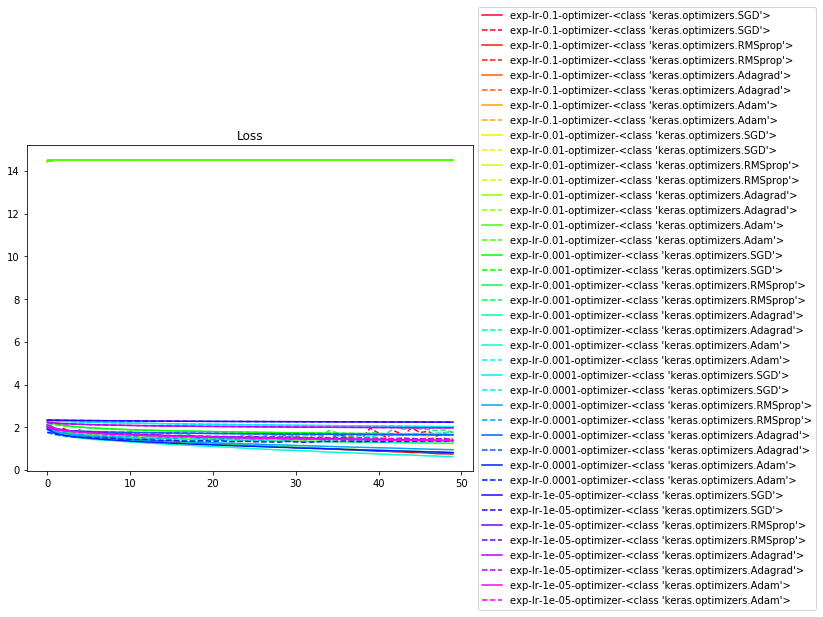

In [26]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

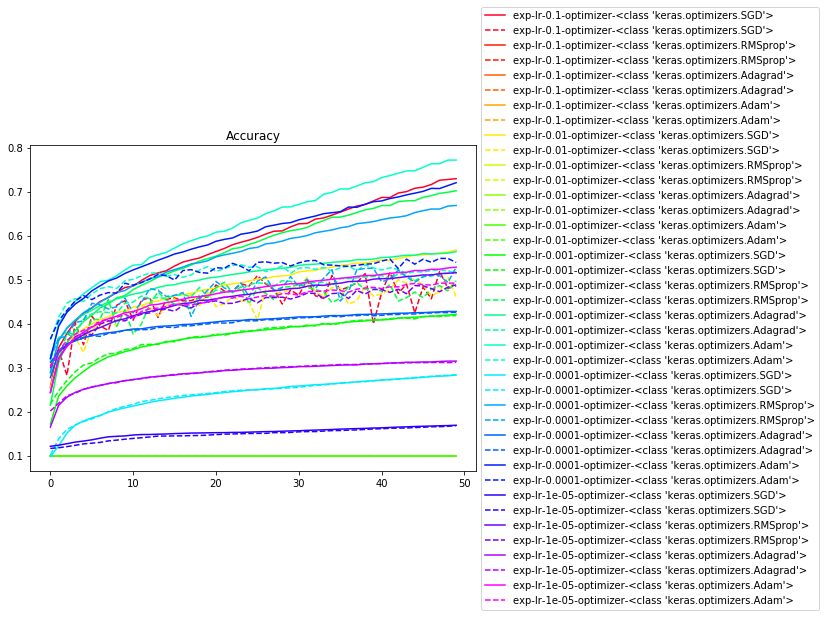

In [27]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()